In [2]:
import pandas as pd  #to read csv file
from sklearn.model_selection import train_test_split #to Split arrays or matrices into random train and test subsets.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC# a 2-dimensional separating hyperplane.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]  #rename the columns from 0 to so on.
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Fist Bump
1,0.188163,0.553577,-1.769854e-07,0.241235,0.570783,0.000998,0.283350,0.567573,-0.004453,0.313150,...,0.296562,0.548301,-0.028608,0.287831,0.563990,-0.024222,0.279902,0.562877,-0.021401,Fist Bump
2,0.189238,0.552665,-4.264629e-08,0.232215,0.566822,-0.004575,0.275586,0.567729,-0.011172,0.310351,...,0.296007,0.552482,-0.018432,0.301816,0.572645,-0.014812,0.307289,0.581671,-0.010897,Fist Bump
3,0.251110,0.536977,-2.014767e-08,0.281782,0.539941,-0.005421,0.325323,0.550121,-0.013349,0.361157,...,0.363962,0.571110,-0.030156,0.356618,0.583200,-0.025077,0.348532,0.580515,-0.020353,Fist Bump
4,0.250447,0.539314,-6.192553e-08,0.284608,0.545890,-0.000919,0.327299,0.553511,-0.007619,0.361078,...,0.359234,0.577149,-0.031790,0.345854,0.586273,-0.024710,0.334314,0.577487,-0.019590,Fist Bump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.339112,0.724930,-3.020244e-07,0.363671,0.674955,-0.005557,0.399189,0.622034,-0.016139,0.419100,...,0.441336,0.759410,-0.056139,0.421613,0.760283,-0.047885,0.401800,0.749053,-0.042327,Yes
479,0.320022,0.736418,-1.694368e-07,0.342883,0.684523,-0.006154,0.378717,0.631388,-0.018507,0.402511,...,0.427900,0.759640,-0.054049,0.414360,0.767864,-0.043881,0.397725,0.764874,-0.035993,Yes
480,0.283617,0.735876,-1.783814e-07,0.310977,0.688025,-0.006114,0.345134,0.633058,-0.020550,0.362429,...,0.386943,0.756811,-0.061694,0.379423,0.763234,-0.052772,0.362834,0.759929,-0.045218,Yes
481,0.233574,0.747488,-2.774793e-07,0.264485,0.696548,-0.002650,0.302212,0.643836,-0.010903,0.321211,...,0.325386,0.763624,-0.051383,0.310088,0.765800,-0.043962,0.292303,0.756334,-0.039238,Yes


In [4]:
df = df.rename(columns={63: 'Output'}) #rename the last cloumn as "Output" instead of some number.
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Fist Bump
1,0.188163,0.553577,-1.769854e-07,0.241235,0.570783,0.000998,0.283350,0.567573,-0.004453,0.313150,...,0.296562,0.548301,-0.028608,0.287831,0.563990,-0.024222,0.279902,0.562877,-0.021401,Fist Bump
2,0.189238,0.552665,-4.264629e-08,0.232215,0.566822,-0.004575,0.275586,0.567729,-0.011172,0.310351,...,0.296007,0.552482,-0.018432,0.301816,0.572645,-0.014812,0.307289,0.581671,-0.010897,Fist Bump
3,0.251110,0.536977,-2.014767e-08,0.281782,0.539941,-0.005421,0.325323,0.550121,-0.013349,0.361157,...,0.363962,0.571110,-0.030156,0.356618,0.583200,-0.025077,0.348532,0.580515,-0.020353,Fist Bump
4,0.250447,0.539314,-6.192553e-08,0.284608,0.545890,-0.000919,0.327299,0.553511,-0.007619,0.361078,...,0.359234,0.577149,-0.031790,0.345854,0.586273,-0.024710,0.334314,0.577487,-0.019590,Fist Bump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.339112,0.724930,-3.020244e-07,0.363671,0.674955,-0.005557,0.399189,0.622034,-0.016139,0.419100,...,0.441336,0.759410,-0.056139,0.421613,0.760283,-0.047885,0.401800,0.749053,-0.042327,Yes
479,0.320022,0.736418,-1.694368e-07,0.342883,0.684523,-0.006154,0.378717,0.631388,-0.018507,0.402511,...,0.427900,0.759640,-0.054049,0.414360,0.767864,-0.043881,0.397725,0.764874,-0.035993,Yes
480,0.283617,0.735876,-1.783814e-07,0.310977,0.688025,-0.006114,0.345134,0.633058,-0.020550,0.362429,...,0.386943,0.756811,-0.061694,0.379423,0.763234,-0.052772,0.362834,0.759929,-0.045218,Yes
481,0.233574,0.747488,-2.774793e-07,0.264485,0.696548,-0.002650,0.302212,0.643836,-0.010903,0.321211,...,0.325386,0.763624,-0.051383,0.310088,0.765800,-0.043962,0.292303,0.756334,-0.039238,Yes


In [5]:
X = df.iloc[:, :-1]  #iloc is used for row and column slicing.
print("Features shape =", X.shape)
#shape is no of rows and columns(rows,columns)
Y = df.iloc[:, -1]#all rows with index and output column only
print("Labels shape =", Y.shape)

Features shape = (483, 63)
Labels shape = (483,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
#splitting whole data into training and testing data with 20%data for test,and random data are selected for test and train
# Building a Support Vector Machine on train data
svm = SVC(C=10,gamma=0.1,kernel='rbf') 
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['Yes', 'Hello', 'Yes', 'iloveu', 'Hello', 'Hello', 'Yes', 'Yes',
       'Hello', 'Yes', 'Peace', 'Hello', 'Yes', 'Peace', 'Yes', 'iloveu',
       'Fist Bump', 'Yes', 'Peace', 'Peace', 'Yes', 'Hello', 'iloveu',
       'Yes', 'Yes', 'Peace', 'Yes', 'Yes', 'Yes', 'Peace', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Peace', 'iloveu', 'Peace', 'Peace',
       'Fist Bump', 'Fist Bump', 'Yes', 'Yes', 'Hello', 'Fist Bump',
       'Yes', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'iloveu', 'Peace',
       'Hello', 'Yes', 'Hello', 'iloveu', 'Peace', 'Peace', 'Peace',
       'Yes', 'Yes', 'Peace', 'Yes', 'iloveu', 'iloveu', 'Peace',
       'Fist Bump', 'Yes', 'Peace', 'Hello', 'Fist Bump', 'Yes', 'iloveu',
       'iloveu', 'Peace', 'Yes', 'Fist Bump', 'Yes', 'Fist Bump', 'Hello',
       'Fist Bump', 'Yes', 'Yes', 'Fist Bump', 'Yes', 'iloveu', 'iloveu',
       'Fist Bump', 'Peace', 'Fist Bump', 'Yes', 'Yes', 'Hello', 'Yes',
       'iloveu', 'Peace'], dtype=object)

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8556701030927835, 0.8556701030927835, 0.8556701030927835)

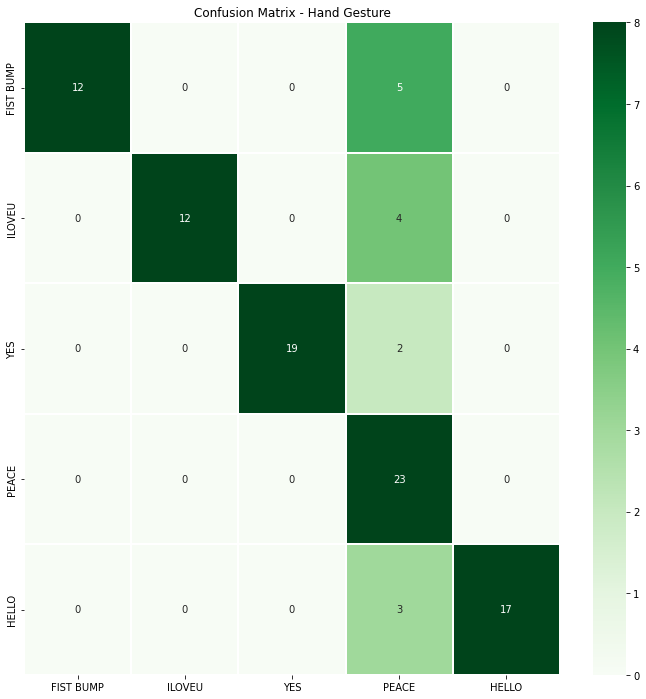

In [9]:
labels = list(set(df['Output']))
labels = [x.upper() for x in labels]

plt.figure(figsize=(12, 12))

plt.title("Confusion Matrix - Hand Gesture")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Greens, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                    )
maping
plt.show()

In [10]:
#The SVM kernel is a function that takes low dimensional input space and transforms it into higher-dimensional space, 
#ie it converts not separable problem to separable problem. It is mostly useful in non-linear separation problems. 
#Simply put the kernel, it does some extremely complex data transformations then finds out the process to separate
#the data based on the labels or outputs defined.

In [11]:
# the gamma parameter defines how far the influence of a single training example reaches, 
#with low values meaning ‘far’ and high values meaning ‘close’.

In [12]:
# For larger values of C, a smaller margin will be accepted if the decision function is better 
#at classifying all training points correctly.
#A lower C will encourage a larger margin

In [13]:
#Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly 
#predicted observation to the total observations.

In [14]:
#Precision - Precision is the ratio of correctly predicted positive observations to the 
#total predicted positive observations. 

In [15]:
#Recall is the ratio of correctly predicted positive observations to the all observations in actual class

In [16]:
#F1 score - F1 Score is the weighted average of Precision and Recall. 
#Therefore, this score takes both false positives and false negatives into account.

In [18]:
import pickle
# save model in train
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)